# FTDS-009 - Graded Challenge #1

## 1.0 Introduction

Hi, I'm Edo Jallil and this is my response to FTDS Graded Challenge #1 regarding the Pokémon dataset.

The dataset contains list of Pokémon with their detail information including their IDs, names, and features that make each Pokémon unique and portraying how strong the Pokémon is.

The objective is to conduct a deep dive analysis on which Pokémon is the strongest and group them by their type to determine the strongest Pokémon in each type depends on user preferences.

## 2.0 Data Analysis

## 2.1 Importing Libraries

In [1]:
# The libraries used in this assignment are Numpy and Pandas
# Start with importing the required libraries and assigning a unique name to each libary
import numpy as np
import pandas as pd

## 2.2 Data Loading & Verification

In [2]:
# Load the Pokémon dataset into Pandas dataframe
pokemon_df = pd.read_csv('Pokemon.csv')

# Check the number of entries & column names, any null data, and data type of each columns
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [3]:
# Check the numerical data, conduct verification for anomalies or wrong entries
pokemon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


In [4]:
# Verify the values in non-null column(s)
pokemon_df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

## 2.3 Data Cleaning

### 2.3.1 Renaming Columns

In [5]:
# Rename some of the column names to avoid any future problem during scripting such as symbols and spaces
pokemon_df.rename(columns = {'#': 'ID', 'Type 1': 'Type_1', 'Type 2': 'Type_2', 'Sp. Atk': 'Sp_Atk', 'Sp. Def': 'Sp_Def'}, inplace=True)

### 2.3.2 Fill In Missing Values

In [6]:
# Fill the missing value in 'Type_2' column with 'SingleType'
pokemon_df.Type_2.fillna('SingleType', inplace=True)
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          800 non-null    int64 
 1   Name        800 non-null    object
 2   Type_1      800 non-null    object
 3   Type_2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp_Atk      800 non-null    int64 
 9   Sp_Def      800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### 2.3.3 Columns Verification & Creating New Column

In [7]:
# Verify the 'Total' column as a summation of all features by adding new colum 'Check_Total'
pokemon_df['Check_Total'] = pokemon_df.Total - (pokemon_df.HP + pokemon_df.Attack + pokemon_df.Defense + pokemon_df.Sp_Atk + pokemon_df.Sp_Def + pokemon_df.Speed)
print(pokemon_df.Check_Total.sum())

0


### 2.3.4 Deleting Column

In [8]:
# Drop the 'Check_Total' columns as the number in 'Total' has been verified
pokemon_df.drop('Check_Total', axis=1, inplace=True)
pokemon_df

,ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,SingleType,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### 2.3.5 Verification by Unique Values

In [9]:
# Check the remaining columns for abnormal values
print('Type 1 = ', pokemon_df.Type_1.unique())
print('Generation = ', pokemon_df.Generation.unique())
print('Legendary = ', pokemon_df.Legendary.unique())

Type 1 =  ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
Generation =  [1 2 3 4 5 6]
Legendary =  [False  True]


In [10]:
pokemon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp_Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp_Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


## 2.4 Data Exploration

### 2.4.1 Data Query

In [11]:
# Querying each Pokémon that has above average skill, including above average in Total
# We don't want any Pokémon that have a high Total score but lack in one of the skills

# Assumed the most important skill is 'Speed' since the earlier it attacks the better
# We sort the highest 'Speed' after sorting the highest 'Total'

above_avg_df = pokemon_df.query('Total > 435.1025 & HP > 69.25875 & Attack > 79.00125 & Defense > 73.8425 & Sp_Atk > 72.82 & Sp_Def > 71.9025 & Speed > 68.2775')[:].sort_values(['Total', 'Speed'], ascending=False)

In [12]:
# Querying each Pokémon that has above Q3 skill, including above Q3 in Total
# We don't want any Pokémon that have a high Total score but lack in one of the skills

# Assumed the most important skill is 'Speed' since the earlier it attacks the better
# We sort the highest 'Speed' after sorting the highest 'Total'

above_q3_df = pokemon_df.query('Total > 515 & HP > 80 & Attack > 100 & Defense > 90 & Sp_Atk > 95 & Sp_Def > 90 & Speed > 90')[:].sort_values(['Total', 'Speed'], ascending=False)

In [13]:
# Showing top 5 of the above average Pokémon
above_avg_df.head(5)

,ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
422,382,KyogrePrimal Kyogre,Water,SingleType,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
552,493,Arceus,Normal,SingleType,720,120,120,120,120,120,120,4,True


In [14]:
# Showing top 5 of the above Q3 Pokémon
above_q3_df.head(5)

,ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
552,493,Arceus,Normal,SingleType,720,120,120,120,120,120,120,4,True
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True


In [15]:
# Querying only the legendary pokemon from the above Q3 dataframe for user preference purpose only
above_q3_df.query('Legendary == True')[:].sort_values(['Total', 'Speed'], ascending=False)

,ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
552,493,Arceus,Normal,SingleType,720,120,120,120,120,120,120,4,True
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True
792,716,Xerneas,Fairy,SingleType,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True


We can see in general Pokémon with #ID 150 and ID# 384 are the top two choices based on each individual features including speed.
Next, we will try to compare these with the Pokémon that have speed above 130.

In [16]:
speed_df = pokemon_df.query('Speed >= 130')[:].sort_values('Speed', ascending=False)
speed_df

,ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,SingleType,600,50,95,90,95,90,180,3,True
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
71,65,AlakazamMega Alakazam,Psychic,SingleType,590,55,50,65,175,95,150,1,False
429,386,DeoxysAttack Forme,Psychic,SingleType,600,50,180,20,180,20,150,3,True
428,386,DeoxysNormal Forme,Psychic,SingleType,600,50,150,50,150,50,150,3,True
154,142,AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
275,254,SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False
678,617,Accelgor,Bug,SingleType,495,80,70,40,100,60,145,5,False
109,101,Electrode,Electric,SingleType,480,60,50,70,80,80,140,1,False


We see that the Pokémon with the highest speed has very low attack value compares to Pokémon #150.
Even though Pokémon #386 has greater speed than #150, but it's defense value is significantly lower.
Up to this point, Pokémon #150 and #384 are still the Top 2 in general.

### 2.4.2 Data Merge, Grouping, & Aggregating

In [17]:
# Combine 'above average' and 'above Q3' dataframe without duplications
combination_df = pd.concat([above_avg_df, above_q3_df]).drop_duplicates().reset_index(drop=True).sort_values(['Total', 'Speed'], ascending=False)
combination_df.head(10)

,ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
1,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
2,382,KyogrePrimal Kyogre,Water,SingleType,770,100,150,90,180,160,90,3,True
3,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
4,493,Arceus,Normal,SingleType,720,120,120,120,120,120,120,4,True
5,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
6,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
7,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
8,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
9,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True


In [18]:
top_10_df = combination_df.head(10)

In [19]:
# Summary of top 10 Pokémon grouped by type
top_10_df.groupby(['Type_1', 'Type_2']).agg({'Total': 'mean', 'ID': 'count'}).sort_values(['Type_1','Type_2'])

Total  ID
Type_1  Type_2               
Dragon  Flying      740.0   2
        Ice         700.0   1
        Psychic     700.0   2
Ground  Fire        770.0   1
Normal  SingleType  720.0   1
Psychic Fighting    780.0   1
Steel   Psychic     700.0   1
Water   SingleType  770.0   1

In [20]:
# Get all Pokémon types from Type_1 and Type_2 columns
all_types = pd.unique(top_10_df[['Type_1', 'Type_2']].values.ravel())
print(np.sort(all_types))

['Dragon' 'Fighting' 'Fire' 'Flying' 'Ground' 'Ice' 'Normal' 'Psychic'
 'SingleType' 'Steel' 'Water']


In [21]:
# For users that prefer some type of Pokémon can choose from the best 10 Pokémon grouped by their type
type = 'Flying'
print(type, 'Type:')
print(top_10_df[(top_10_df.Type_1 == type) | (top_10_df.Type_2 == type)])

Flying Type:
    ID                     Name  Type_1  Type_2  Total   HP  Attack  Defense  \
1  384    RayquazaMega Rayquaza  Dragon  Flying    780  105     180      100   
5  373  SalamenceMega Salamence  Dragon  Flying    700   95     145      130   

   Sp_Atk  Sp_Def  Speed  Generation  Legendary  
1     180     100    115           3       True  
5     120      90    120           3      False  


In [22]:
# Or users can also group the Pokémon by their generation or legendary status
gen = 4
print('Generation', gen)
leg = True
if leg == True:
    print('Legendary: Yes')
else:
    print('Legendary: No')
print(top_10_df[(top_10_df.Generation == gen) & (top_10_df.Legendary == leg)])

Generation 4
Legendary: Yes
    ID    Name  Type_1      Type_2  Total   HP  Attack  Defense  Sp_Atk  \
4  493  Arceus  Normal  SingleType    720  120     120      120     120   

   Sp_Def  Speed  Generation  Legendary  
4     120    120           4       True  


Let's say if a user wants to have a group of three Pokémons where one of them has Flying type and the other has Ice type, then the recommendation would be: Pokémon #150 (the best of the bunch), Pokémon #384 (Flying type), and Pokémon #646 (Ice type).

### 2.4.3 Data Plotting

<AxesSubplot:>

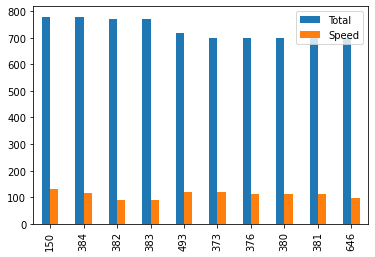

In [23]:
# Plot the top 10 Pokémon based on their Total feature values and Speed using barchart
Total = np.array(top_10_df.Total)
Speed = np.array(top_10_df.Speed)
ID = np.array(top_10_df.ID)
pd.DataFrame({'Total': Total, 'Speed': Speed}, index = ID).plot.bar()

## 3.0 Analysis Summary

Based on the analysis of Pokémon dataframe, we can conclude that the best Pokémon of the bunch is Pokémon ID #150 and Pokémon ID #384, orderly. Both have the features and Total value above Q3 of the population.

Users can also pick the Pokémon based on its type as preferred. For instance, if the user wants to have a group of three Pokémons where one of them has Flying type and the other has Ice type, then the recommendation would be: Pokémon #150 (the best of the bunch), Pokémon #384 (Flying type), and Pokémon #646 (Ice type).

The analysis is based on their overall features including HP, Attack, Defense, SP Atk, SP Def, and Speed which are summed in Total values. Speed was also considered as the most important feature since the earlier the Pokémon attack, will be beneficial for the HP counts in overall.